In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')
import copy

name_to_search = input("Which celeb you want to look up?: ")
entire_url_to_query_to_get_actor_code = 'http://www.imdb.com/find?ref_=nv_sr_fn&q=' + name_to_search



r = requests.get(entire_url_to_query_to_get_actor_code, verify=False,)

soup = BeautifulSoup(r.content , "lxml", )



actor = soup.find('td' , class_='result_text')


encoded_name_link = actor.find('a')
uri_portion = ((encoded_name_link['href']))
print(uri_portion)

entire_url_to_query_to_get_actor_page = 'http://www.imdb.com' + uri_portion
actor_page_response = requests.get(entire_url_to_query_to_get_actor_page, verify=False,  )
actor_soup = BeautifulSoup(actor_page_response.content , 'lxml')


films_tag = actor_soup.find( 'div', class_='filmo-category-section', )



ruleset_of_years = (films_tag.findAll('span' , class_='year_column'))


list_of_years = []

for year in range(len(ruleset_of_years)):
    list_of_years.append(ruleset_of_years[year].text)


list_of_years_just_digits = []
    
#print(type(list_of_years))  


for each_string in list_of_years:
    list_of_years_just_digits.append(re.sub('[^0-9]', '', each_string))
  
count = Counter(list_of_years_just_digits)   
print ((count))


#a
lists = sorted(count.items())
x, y = zip(*lists)
colortuple = copy.deepcopy(x)
colorlist = list(colortuple)

print((colorlist))

plt.xticks(rotation=90,)
plt.title('Movies by year for ' +  str.title(name_to_search) )

plt.rcParams.update({'figure.autolayout': True})



for i in range(len(colorlist)):
    colorlist[i] = 'y'

plt.bar(x, y , color=colorlist )


plt.show()
print((colorlist))



        
print(colorlist)        



Which celeb you want to look up?: al pacino


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Oscars won by Al Pacino 
 1993

oscar winning years ==>['1993']
Which celeb you want to look up?: al pacino


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/name/nm0000199/?ref_=fn_al_nm_1


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Counter({'2013': 3, '2003': 3, '2002': 3, '1990': 3, '2019': 2, '2017': 2, '2014': 2, '2011': 2, '2007': 2, '1999': 2, '1997': 2, '1995': 2, '1992': 2, '1977': 2, '1973': 2, '2018': 1, '2016': 1, '2015': 1, '2012': 1, '2010': 1, '2008': 1, '2005': 1, '2004': 1, '2000': 1, '1996': 1, '1993': 1, '1991': 1, '1989': 1, '1985': 1, '1983': 1, '1982': 1, '1980': 1, '1979': 1, '1975': 1, '1974': 1, '1972': 1, '1971': 1, '1969': 1, '1968': 1})
['1968', '1969', '1971', '1972', '1973', '1974', '1975', '1977', '1979', '1980', '1982', '1983', '1985', '1989', '1990', '1991', '1992', '1993', '1995', '1996', '1997', '1999', '2000', '2002', '2003', '2004', '2005', '2007', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


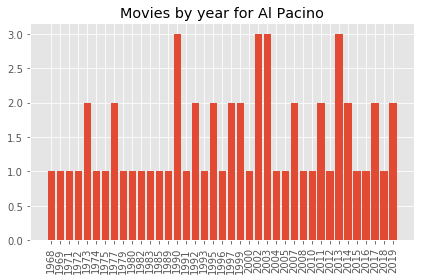

In [10]:
"""
OSCAR CODE


"""

import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pylab as plt
%matplotlib inline

name_to_search = input("Which celeb you want to look up?: ")
entire_url_to_query_to_get_actor_code = 'http://www.imdb.com/find?ref_=nv_sr_fn&q=' + name_to_search
r = requests.get(entire_url_to_query_to_get_actor_code, verify=False,)
soup = BeautifulSoup(r.content , "lxml", )
actor = soup.find('td' , class_='result_text')
encoded_name_link = actor.find('a')
uri_portion = ((encoded_name_link['href']))
truncated_to_code = uri_portion.rsplit( '?' , 1  )[0]


entire_url_to_query_to_get_oscar_page = 'http://www.imdb.com' + truncated_to_code + 'awards?ref_=nm_awd'



r = requests.get(entire_url_to_query_to_get_oscar_page, verify=False,)
soup = BeautifulSoup( r.text , "lxml" )


oscar_table = (soup.find('table' , class_= 'awards' ))



winnertext = oscar_table.findAll('b', text='Winner')

 

print ("Oscars won by " + str.title(name_to_search) + " " )
list_of_oscars_years = []
list_of_oscars_years_just_digits = []

for each_tag in winnertext:
    if (each_tag.findPrevious('h3' , text="Academy Awards, USA")):
        print((each_tag.findPrevious('a')).text)
        list_of_oscars_years.append((each_tag.findPrevious('a')).text)
        

        


for each_string in list_of_oscars_years:
    list_of_oscars_years_just_digits.append(re.sub('[^0-9]', '', each_string))
  

print ('oscar winning years ==>' + "" + str(list_of_oscars_years_just_digits) )        




'''

OSCAR CODE FINISHED

'''



import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')
import copy

name_to_search = input("Which celeb you want to look up?: ")
entire_url_to_query_to_get_actor_code = 'http://www.imdb.com/find?ref_=nv_sr_fn&q=' + name_to_search



r = requests.get(entire_url_to_query_to_get_actor_code, verify=False,)

soup = BeautifulSoup(r.content , "lxml", )



actor = soup.find('td' , class_='result_text')


encoded_name_link = actor.find('a')
uri_portion = ((encoded_name_link['href']))
print(uri_portion)

entire_url_to_query_to_get_actor_page = 'http://www.imdb.com' + uri_portion
actor_page_response = requests.get(entire_url_to_query_to_get_actor_page, verify=False,  )
actor_soup = BeautifulSoup(actor_page_response.content , 'lxml')


films_tag = actor_soup.find( 'div', class_='filmo-category-section', )



ruleset_of_years = (films_tag.findAll('span' , class_='year_column'))


list_of_years = []

for year in range(len(ruleset_of_years)):
    list_of_years.append(ruleset_of_years[year].text)


list_of_years_just_digits = []
    
#print(type(list_of_years))  


for each_string in list_of_years:
    list_of_years_just_digits.append(re.sub('[^0-9]', '', each_string))
  
count = Counter(list_of_years_just_digits)   
print ((count))


#a
lists = sorted(count.items())
x, y = zip(*lists)
colortuple = copy.deepcopy(x)
colorlist = list(colortuple)

#print((colorlist))

plt.xticks(rotation=90,)
plt.title('Movies by year for ' +  str.title(name_to_search) )

plt.rcParams.update({'figure.autolayout': True})

#for i in range(len(list_of_years_just_digits)):
#    colorlist[i] = 'y'
#
#
#for i in range(len(list_of_years_just_digits)):
#    for j in range(len(list_of_oscars_years_just_digits)):
#            if list_of_oscars_years_just_digits[j] == list_of_years_just_digits[i]:
#                colorlist[i] = 'r'
#             

print (colorlist)     
    
plt.bar(x, y , ) #color=colorlist )


plt.show()




        
#print(colorlist)        
        